#modelos de regresion lineal
#modelos con datos simulados
y = a + b * x
x: 100 valores distribuidos segun una N(1.5, 2.5)
Ye = 2 + 0.3 * x + e
estara distribuido segun una normal de(0, 0.8)


In [2]:
import pandas as pd
import numpy as np

In [5]:
x = 1.5 + 2.5 * np.random.randn(100)

In [6]:
res = 0 + 0.8 * np.random.randn(100)

In [7]:
y_pred = 5 + 1.9 * x

In [8]:
y_act = 5 + 1.9 * x + res 

In [10]:
x_list = x.tolist()
y_pred_list = y_pred.tolist()
y_act_list = y_act.tolist()

In [11]:
data = pd.DataFrame(

    { 
        'x':x_list,
        'y_actual':y_act_list,
        'y_prediccion':y_pred_list
        
    }
)

In [12]:
data.head()

,x,y_actual,y_prediccion
0,3.566987,12.751838,11.777276
1,1.344393,7.597977,7.554347
2,5.947006,16.175912,16.299312
3,0.815036,6.680994,6.548569
4,2.952402,9.895718,10.609564


In [13]:
import matplotlib.pyplot as plt

In [19]:
y_mean = [np.mean(y_act) for i in range(1, len(x_list) + 1)]

Text(0.5, 1.0, 'valor actual de la prediccion')

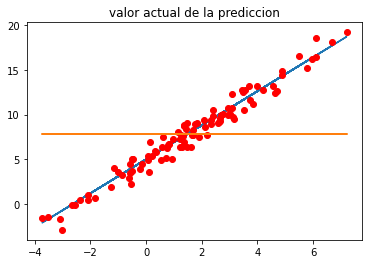

In [20]:
%matplotlib inline
plt.plot(x,y_pred)
plt.plot(x, y_act,"ro")
plt.plot(x, y_mean)
plt.title("valor actual de la prediccion")

In [22]:
data["SSR"]=(data["y_prediccion"]-np.mean(y_act))**2
data["SSD"]=(data["y_prediccion"]-data["y_actual"])**2
data["SST"]=(data["y_actual"]-np.mean(y_act))**2

In [23]:
data.head()

,x,y_actual,y_prediccion,SSR,SSD,SST
0,3.566987,12.751838,11.777276,15.607063,0.949772,24.257005
1,1.344393,7.597977,7.554347,0.074175,0.001904,0.052313
2,5.947006,16.175912,16.299312,71.785181,0.015227,69.709373
3,0.815036,6.680994,6.548569,1.633613,0.017536,1.312637
4,2.952402,9.895718,10.609564,7.744344,0.509576,4.280845


In [24]:
SSR = sum(data["SSR"])
SSD = sum(data["SSD"])
SST = sum(data["SST"])

In [25]:
SSR

1959.7212688552784

In [26]:
SSD

75.14700218292126

In [27]:
SST

2106.607472287093

In [28]:
R2 = SSR/SST

In [29]:
R2

0.9302735771309385

(array([ 2.,  6.,  9., 12., 21., 19., 12.,  9.,  8.,  2.]),
 array([-1.98568042, -1.5712481 , -1.15681578, -0.74238346, -0.32795113,
         0.08648119,  0.50091351,  0.91534583,  1.32977815,  1.74421048,
         2.1586428 ]),
 <a list of 10 Patch objects>)

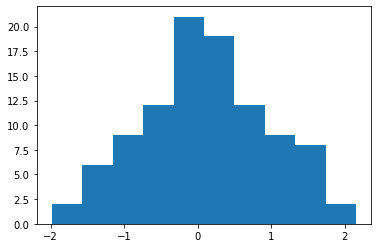

In [32]:
plt.hist(data["y_prediccion"]-data["y_actual"])

#obteniendo la recta de regresion
#y = a + b * x
#b = sum((xi-x_m)*(y_i-y_m))/sum((xi-x_m)^2)
#a-y_n-b*x_m

In [34]:
x_mean = np.mean(data["x"])
y_mean = np.mean(data["y_actual"])
x_mean, y_mean

(1.5493237373472988, 7.826698079769601)

In [37]:
data["beta_n"] = (data["x"]-x_mean)*(data["y_actual"]-y_mean)
data["beta_b"] = (data["x"]-x_mean)**2

In [40]:
beta = sum(data["beta_n"])/sum(data["beta_b"])

In [41]:
alpha = y_mean - beta * x_mean

In [42]:
alpha, beta

(4.827006979178577, 1.9361293113129447)

El modelo lineal obtenido por regresion es: y = 4.827006979178577 + 1.9361293113129447*x

In [44]:
data["y_model"] = alpha + data["x"]

In [45]:
data.head()

,x,y_actual,y_prediccion,SSR,SSD,SST,beta_n,beta_b,y_model
0,3.566987,12.751838,11.777276,15.607063,0.949772,24.257005,9.937275,4.070966,8.393994
1,1.344393,7.597977,7.554347,0.074175,0.001904,0.052313,0.046872,0.041997,6.171400
2,5.947006,16.175912,16.299312,71.785181,0.015227,69.709373,36.717191,19.339610,10.774013
3,0.815036,6.680994,6.548569,1.633613,0.017536,1.312637,0.841276,0.539178,5.642043
4,2.952402,9.895718,10.609564,7.744344,0.509576,4.280845,2.902998,1.968629,7.779409


In [47]:
SSR = sum((data["y_model"]-y_mean)**2)
SSD = sum((data["y_model"]-data["y_actual"])**2)
SST = sum((data["y_actual"]-y_mean)**2)

In [48]:
SSR, SSD, SST

(752.8363190662978, 758.8218234799967, 2106.607472287094)

In [49]:
R2 = SSR/SST

In [50]:
R2

0.3573690537843584